# Regression : Assignment 02

# Tip Prediction on Tips Dataset

Task:

*   To predict the tip amount on the basis of total bill, sex, smoker, time, day and size of the party.



# Data Processing

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
# Importing Data
df = pd.read_csv('/content/tips (data for regression problem).csv')

About data

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.shape

(244, 7)

In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Univariate Analysis



*   total_bill



<Axes: ylabel='Frequency'>

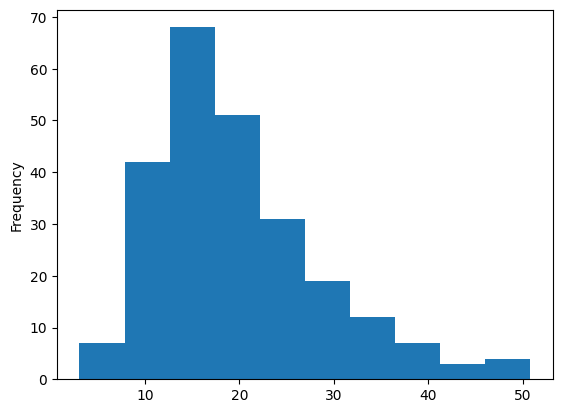

In [8]:
df['total_bill'].plot(kind='hist')



*   tips



<Axes: ylabel='Frequency'>

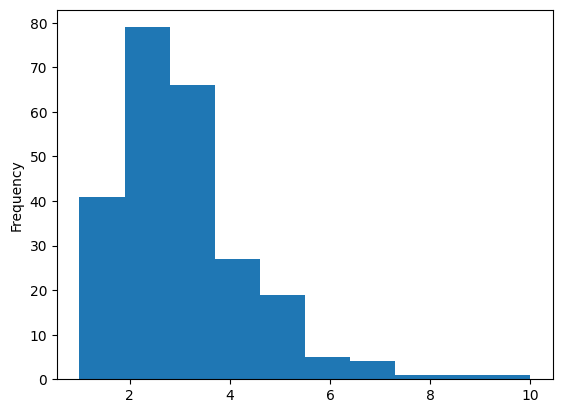

In [9]:
df['tip'].plot(kind='hist')



*   sex



<Axes: xlabel='sex'>

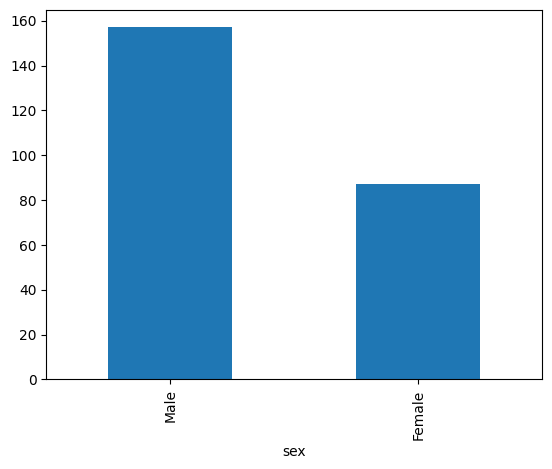

In [10]:
df['sex'].value_counts().plot(kind='bar')



*   Smoker



<Axes: xlabel='smoker'>

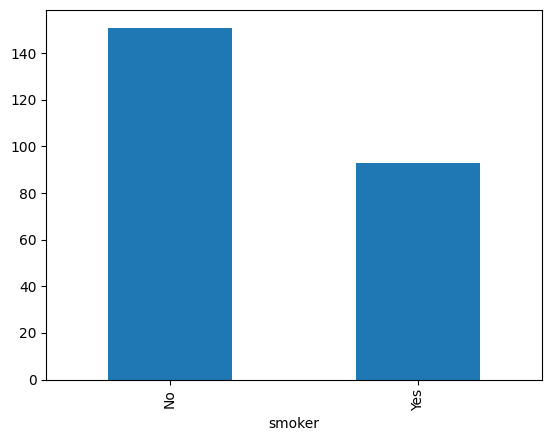

In [11]:
df['smoker'].value_counts().plot(kind='bar')



*   Time



<Axes: xlabel='time'>

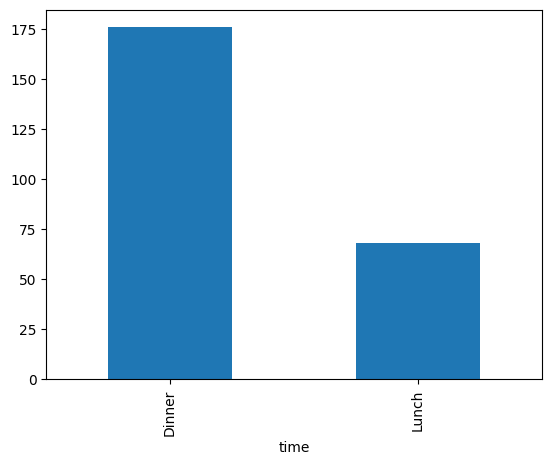

In [12]:
df['time'].value_counts().plot(kind='bar')



*   Day



<Axes: xlabel='day'>

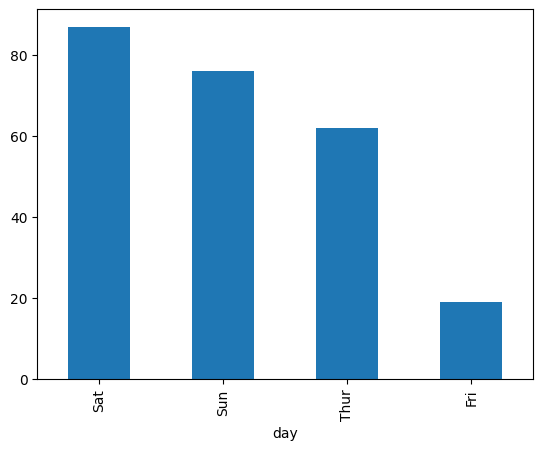

In [13]:
df['day'].value_counts().plot(kind='bar')

# Bivariate Analysis



*   Total_bill VS tip



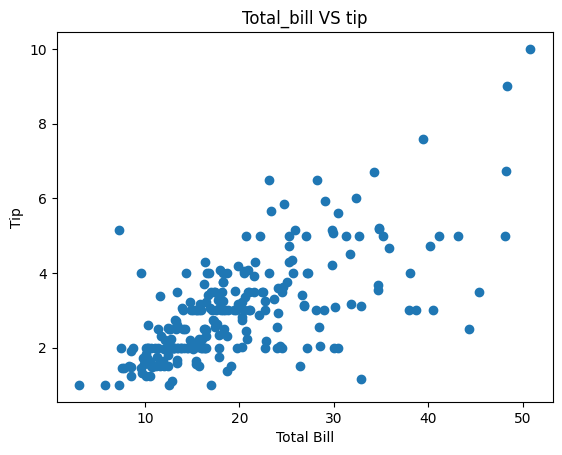

In [14]:
# Plotting the graph of total_bill and tip
plt.title('Total_bill VS tip')
plt.scatter(df['total_bill'], df['tip'])

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()



*   Total_bill distribution between male and female


<Axes: xlabel='sex'>

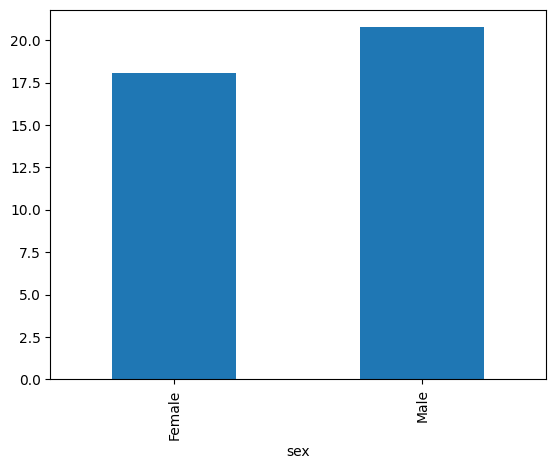

In [15]:
df.groupby('sex')['total_bill'].mean().plot(kind='bar')



*   Total_bill distribution between Smoker and non smoker



<Axes: xlabel='smoker'>

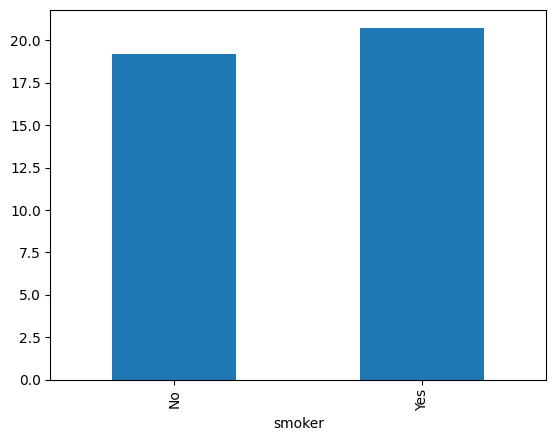

In [16]:
df.groupby('smoker')['total_bill'].mean().plot(kind='bar')



*   Total_bill distribution between days



<Axes: xlabel='day'>

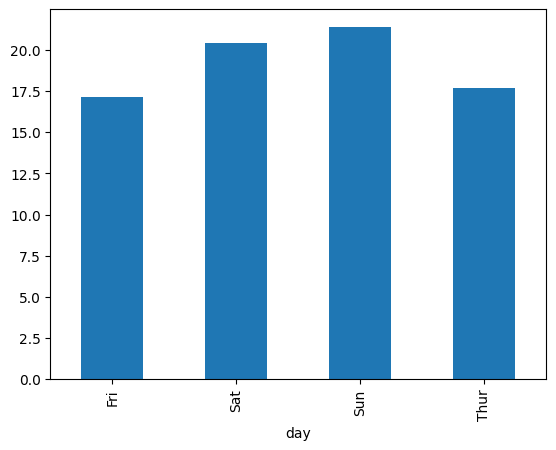

In [17]:
df.groupby('day')['total_bill'].mean().plot(kind='bar')



*   Total_bill distribution between time



<Axes: xlabel='time'>

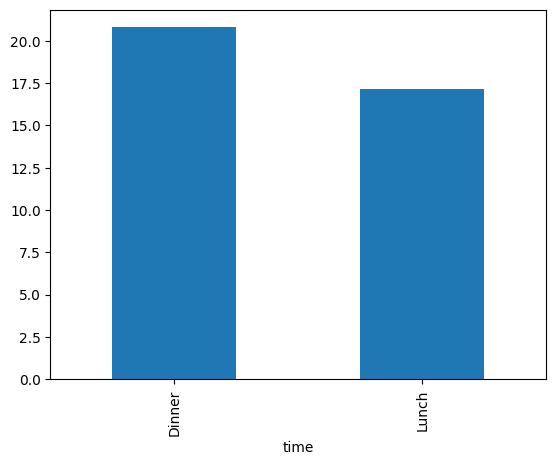

In [18]:
df.groupby('time')['total_bill'].mean().plot(kind='bar')

# Multivariate Analysis



*   Plotting the scatter plot of Total_bill, tip and sex



<Axes: xlabel='total_bill', ylabel='tip'>

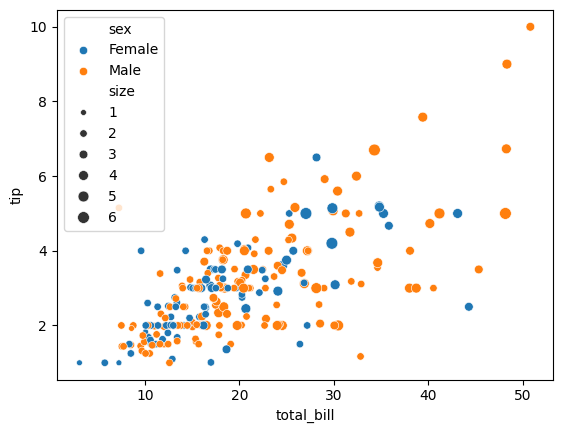

In [19]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='sex')



*   Plotting the scatter plot of Total_bill, tip and smoker



<Axes: xlabel='total_bill', ylabel='tip'>

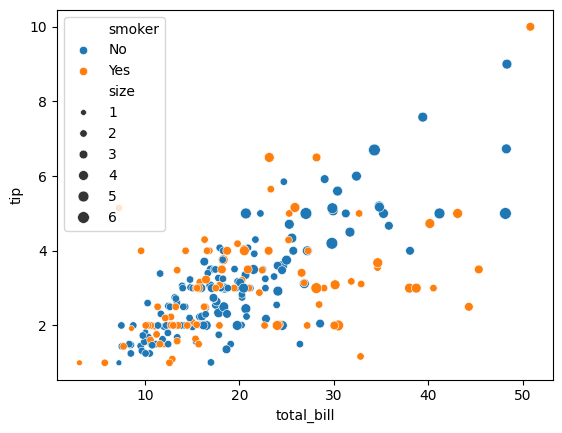

In [20]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='smoker')



*   Plotting the scatter plot of Total_bill, tip and day



<Axes: xlabel='total_bill', ylabel='tip'>

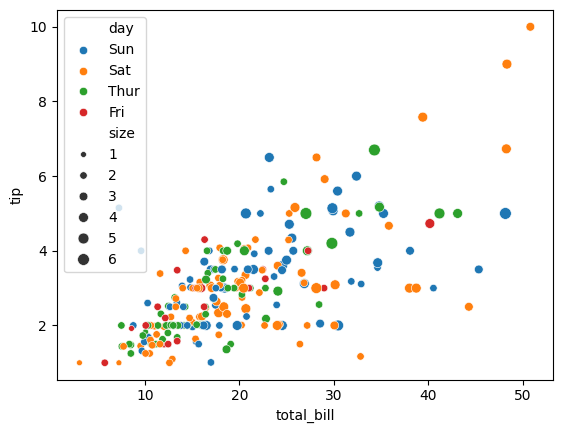

In [21]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='day')



*   Plotting the scatter plot of Total_bill, tip and time



<Axes: xlabel='total_bill', ylabel='tip'>

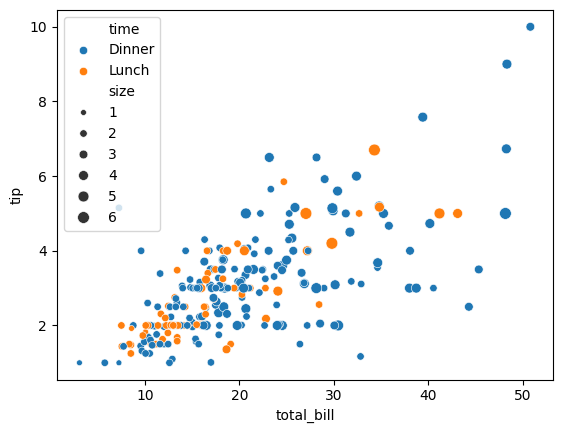

In [22]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='time')



*   Correlation Matrix



In [44]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000




*   Heatmap



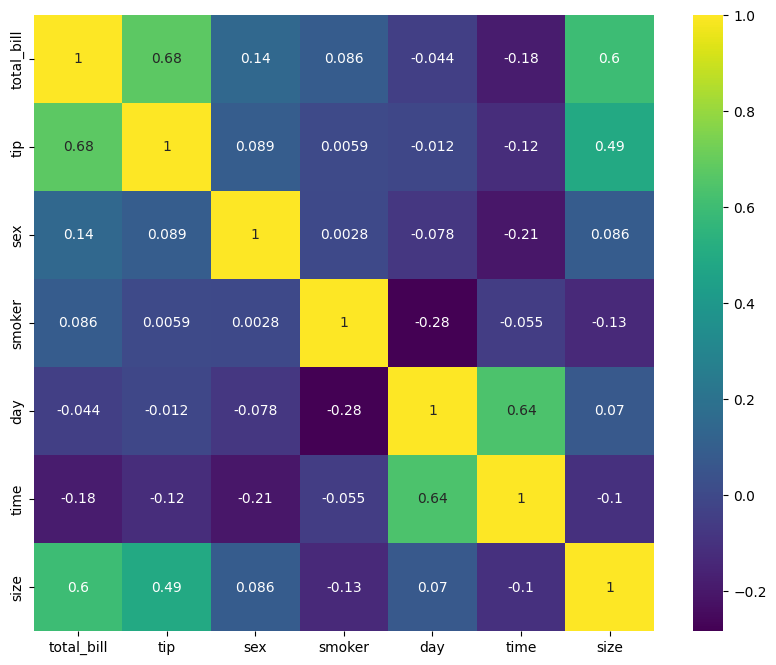

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

# Model Building



*   Label Encoding the categorical columns



In [23]:
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
day_le = LabelEncoder()
time_le = LabelEncoder()


df['sex'] = sex_le.fit_transform(df['sex'])
df['smoker'] = smoker_le.fit_transform(df['smoker'])
df['day'] = day_le.fit_transform(df['day'])
df['time'] = time_le.fit_transform(df['time'])



*   Spliting the data into X and y



In [24]:
# Split the data into X and y
X = df[['total_bill','tip','sex','smoker','day','time']]
y = df['tip']



*   Scaling the data



In [25]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)



*   Spliting the data into train and test sets



In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)

# Linear Regression



*   Intializing, Training and Evaluating the model



In [27]:
# Building the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)



*   Checking the model Score



In [28]:
# checking the scores of the model

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test, y_pred)

print('MAE is : ',mae)
print('MSE is : ',mse)
print('R2 is  : ',r2)

MAE is :  2.6010939434075094e-15
MSE is :  1.1539103139125718e-29
R2 is  :  1.0


# Ridge Regression

In [29]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation

print('Ridge Regression MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('Ridge Regression MSE:', mean_squared_error(y_test, y_pred_ridge))
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression MAE: 0.0067335899297257815
Ridge Regression MSE: 9.234075450061871e-05
Ridge Regression R2: 0.9999512534862373


# Lasso Regression

In [30]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred_lasso))
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

Lasso Regression MAE: 0.007259260649325782
Lasso Regression MSE: 0.00010051515798041039
Lasso Regression R2: 0.999946938233737


# Decision Tree Regression

In [31]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree MAE:', mean_absolute_error(y_test, y_pred_tree))
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred_tree))
# print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))


Decision Tree MAE: 0.02632653061224491
Decision Tree MSE: 0.015116326530612234
Decision Tree R2: 0.9920201191418421


# Ensemble Method (Random Forest Regression)

In [32]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation

print('Random Forest MAE:', mean_absolute_error(y_test, y_pred_forest))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_forest))
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest MAE: 0.026753061224489595
Random Forest MSE: 0.01444406591836708
Random Forest R2: 0.9923750042774923


# Support Vector Regression (SVR)

In [36]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation

print('SVR MAE:', mean_absolute_error(y_test, y_pred_svr))
print('SVR MSE:', mean_squared_error(y_test, y_pred_svr))
print('SVR R2:', r2_score(y_test, y_pred_svr))

SVR MAE: 0.12661745860327459
SVR MSE: 0.04190048529996794
SVR R2: 0.9778808111934058


# K-Nearest Neighbors (KNN) Regression

In [37]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation

print('KNN Regression MAE:', mean_absolute_error(y_test, y_pred_knn))
print('KNN Regression MSE:', mean_squared_error(y_test, y_pred_knn))
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

KNN Regression MAE: 0.4097959183673469
KNN Regression MSE: 0.3282277551020409
KNN Regression R2: 0.8267291742639514


# Plot Analysis

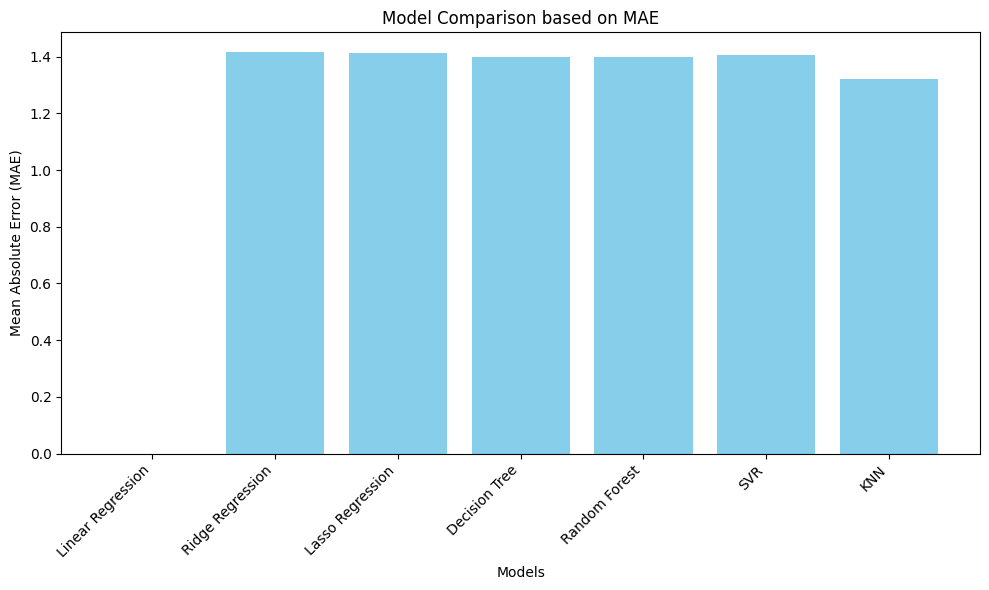

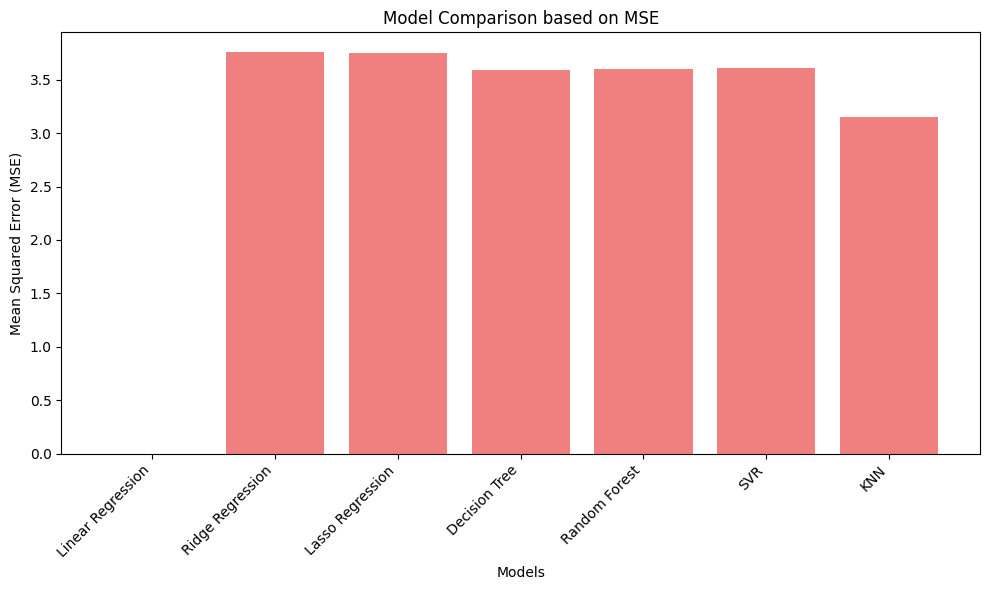

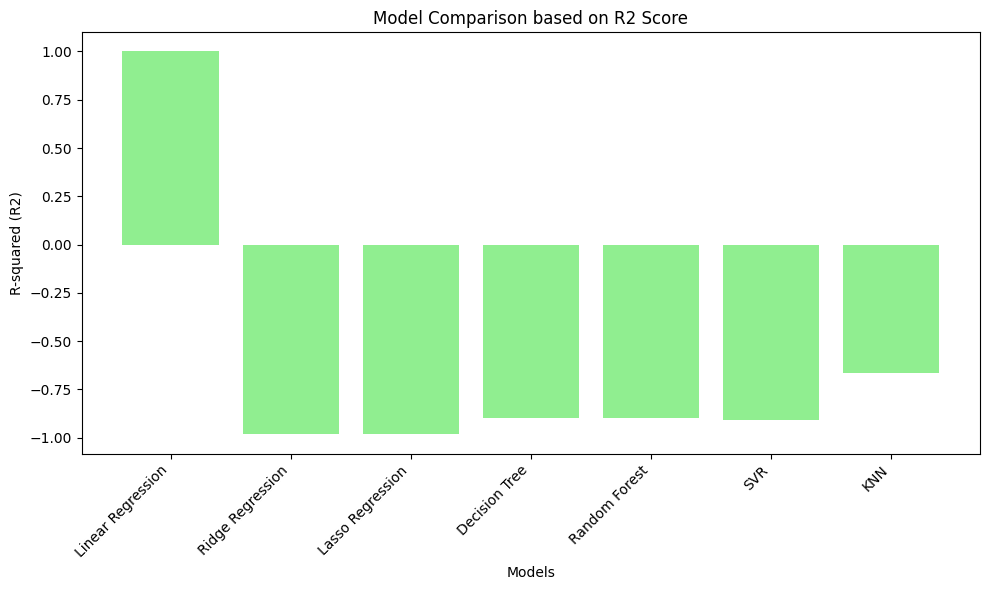

In [47]:
# prompt: plot analysis for all models above
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'mae', 'mse', 'r2', 'y_test', 'y_pred_ridge', 'y_pred_lasso',
# 'y_pred_tree', 'y_pred_forest', 'y_pred_svr', 'y_pred_knn' are defined

# Model performance comparison
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']

# Ensure all predictions are the same length as y_test
y_pred_ridge = y_pred_ridge[:len(y_test)]
y_pred_lasso = y_pred_lasso[:len(y_test)]
y_pred_tree = y_pred_tree[:len(y_test)]
y_pred_forest = y_pred_forest[:len(y_test)]
y_pred_svr = y_pred_svr[:len(y_test)]
y_pred_knn = y_pred_knn[:len(y_test)]

mae_scores = [mae, mean_absolute_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_lasso),
              mean_absolute_error(y_test, y_pred_tree), mean_absolute_error(y_test, y_pred_forest),
              mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_knn)]
mse_scores = [mse, mean_squared_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_lasso),
              mean_squared_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_forest),
              mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_knn)]
r2_scores = [r2, r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso),
             r2_score(y_test, y_pred_tree), r2_score(y_test, y_pred_forest),
             r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_knn)]

# Plotting MAE scores
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison based on MAE")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting MSE scores
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='lightcoral')
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison based on MSE")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting R2 scores
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='lightgreen')
plt.xlabel("Models")
plt.ylabel("R-squared (R2)")
plt.title("Model Comparison based on R2 Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

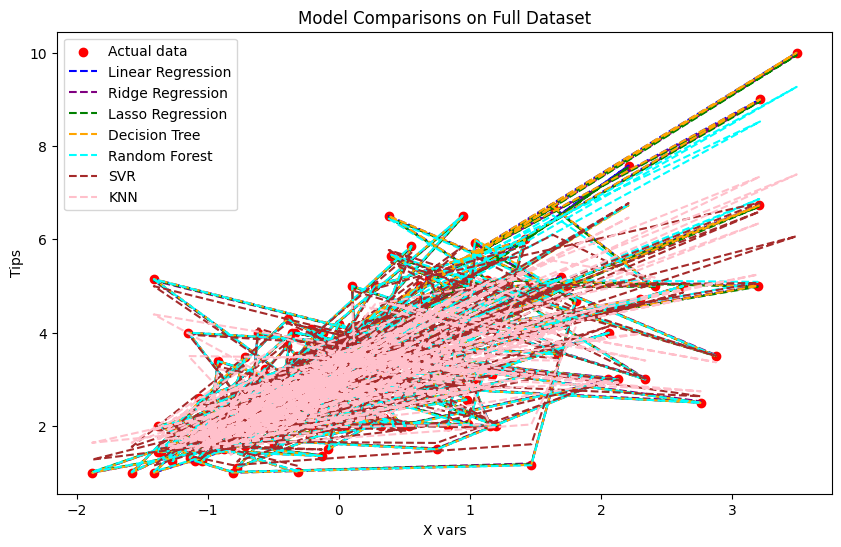

In [43]:
import matplotlib.pyplot as plt
import numpy as np

model.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = model.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

plt.figure(figsize=(10, 6))

# Assuming 'Level' is the first feature in your dataset:
plt.scatter(X[:, 0], y, color='red', label='Actual data') # Select the first column of X for plotting

# Plot each model's predictions, also selecting the first column of X:
plt.plot(X[:, 0], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X[:, 0], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X[:, 0], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X[:, 0], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X[:, 0], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X[:, 0], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X[:, 0], y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('X vars')
plt.ylabel('Tips')
plt.legend()
plt.show()

**By  analysing the results Linear Regression perfectly matches for the given dataset.**



*   Submitted By: Tarannum, 24565018

